# Chapter 02 - Digital Image Fundamentals

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Resize

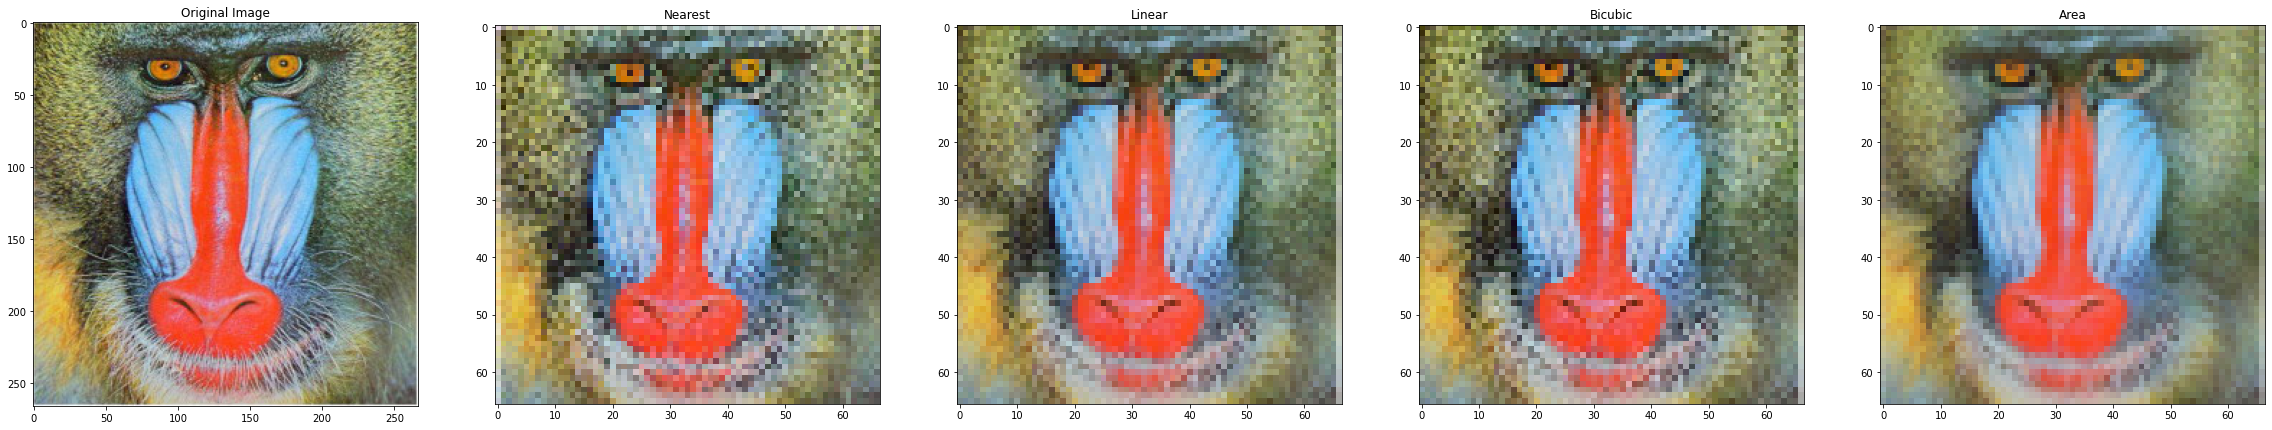

In [2]:
baboon_path   = r"../data/Baboon.png"
baboon_img    = cv2.imread(baboon_path)[..., ::-1]

scale_factor  = 1/4
baboon_naer   = cv2.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
baboon_linear = cv2.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
baboon_cubic  = cv2.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
baboon_area   = cv2.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)

plt.figure(figsize=(40, 20))
plt.subplot(151);plt.title('Original Image');plt.imshow(baboon_img)
plt.subplot(152);plt.title('Nearest');plt.imshow(baboon_naer)
plt.subplot(153);plt.title('Linear');plt.imshow(baboon_linear)
plt.subplot(154);plt.title('Bicubic');plt.imshow(baboon_cubic)
plt.subplot(155);plt.title('Area');plt.imshow(baboon_area)

# Color Quantization

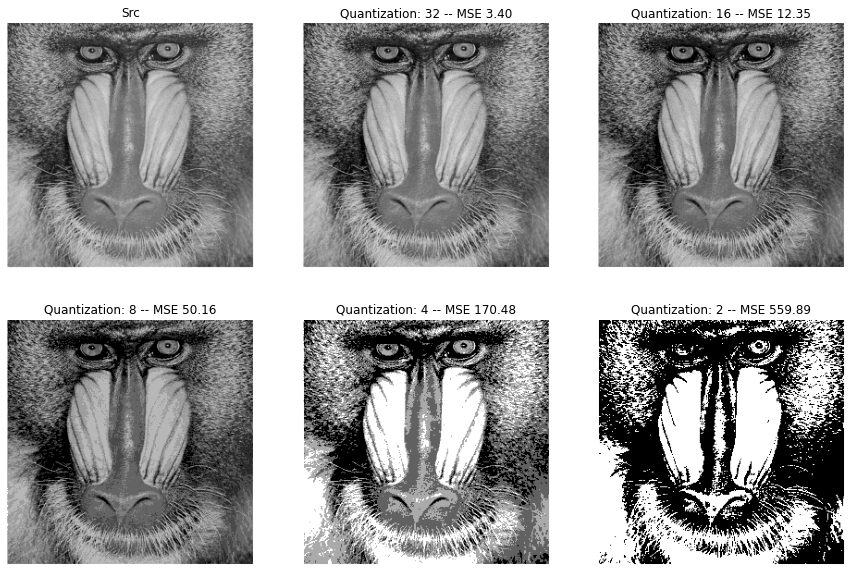

In [3]:
def get_segmented_img(src, num_colors=2):
    
    vector  = src.reshape(-1).astype(np.float32)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 5, 1.0)
    _, labels, centers=cv2.kmeans(vector, num_colors, None, criteria, attempts=5, flags=cv2.KMEANS_PP_CENTERS)
    # center: value of kmeans center
    # label: index of associeted cluster per pixel

    labels_w_color  = centers[labels.flatten()] 
    segmented       = labels_w_color.reshape((src.shape)).astype(np.uint8)
    return segmented 

src             = cv2.imread(baboon_path, 0)
num_colors_list = [32, 16, 8, 4, 2]

plt.figure(figsize=(15, 10))
plt.subplot(231);plt.title("Src");plt.axis('off');plt.imshow(src, cmap='gray')
for idx, num_colors in enumerate(num_colors_list):
    plt.subplot(2,3, idx + 2)
    seg = get_segmented_img(src, num_colors)
    mse = np.mean((src.astype(np.int) - seg) ** 2)
    plt.title(f"Quantization: {num_colors} -- MSE {mse:0.2f}");plt.axis('off')
    plt.imshow(seg, cmap='gray')

# Adição P/ Remoção De Ruido Aleatorio

In [4]:
#Load Image
lenna_path = r"../data/Lenna.png"
lenna_img  = cv2.imread(lenna_path)[..., ::-1]

In [5]:
def get_n_noisy_imgs(src, n_images=10, mean=0, std=10):
    """ Return a list of images with Gaussian noise. """

    lenna_imgs = []
    for idx in range(n_images):
        random_noise = np.random.normal(mean, std, lenna_img.shape).round()
        lenna_n      = (lenna_img + random_noise).clip(0, 255).astype(np.uint8)
        lenna_imgs.append(lenna_n)
        
    return lenna_imgs

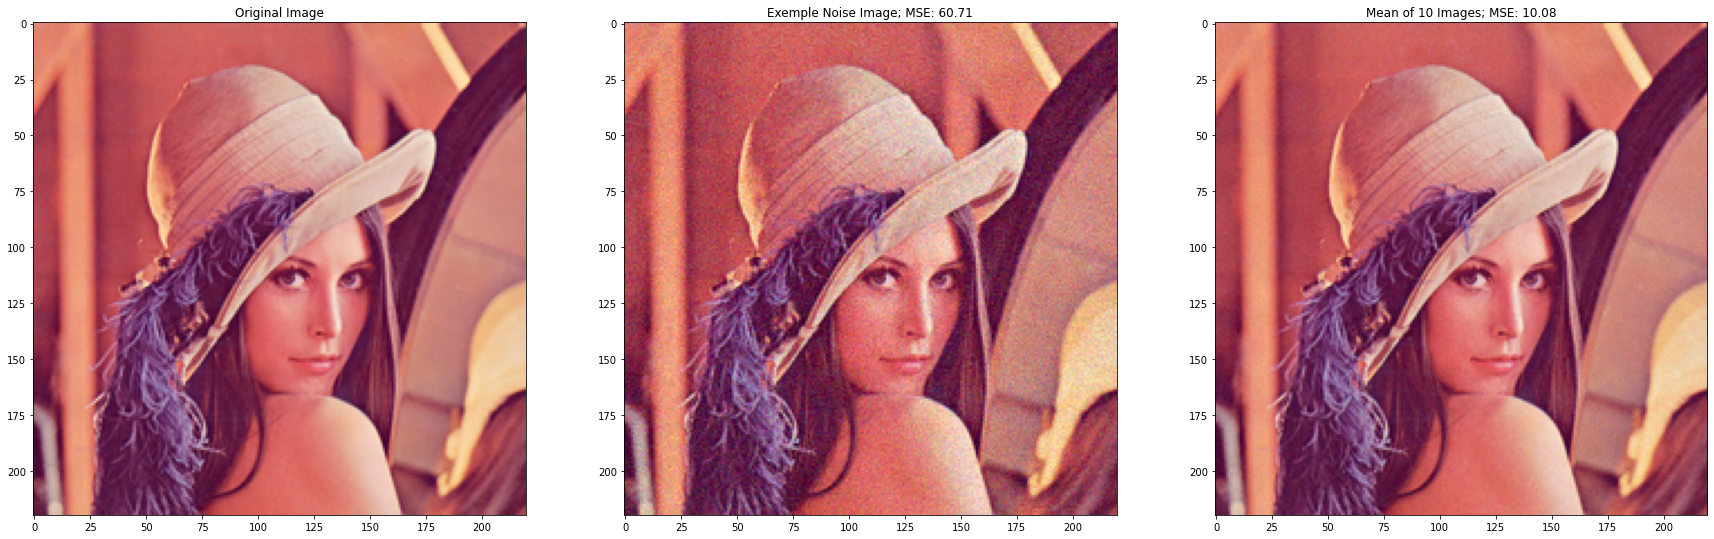

In [6]:
n_images   = 10
lenna_imgs = get_n_noisy_imgs(lenna_img, n_images)
mean_img   = (np.sum(lenna_imgs,axis=0)/len(lenna_imgs)).round().astype(np.uint8)

mse_noise = np.mean((lenna_img - lenna_imgs[0]) ** 2)
mse_mean  = np.mean((lenna_img - mean_img) ** 2)

plt.figure(figsize=(30, 30))
plt.subplot(131)
plt.title("Original Image");
plt.imshow(lenna_img)
plt.subplot(132)
plt.title(f"Exemple Noise Image; MSE: {mse_noise:0.2f}")
plt.imshow(lenna_imgs[0].astype(np.uint8))
plt.subplot(133)
plt.title(f"Mean of {len(lenna_imgs)} Images; MSE: {mse_mean:0.2f}")
plt.imshow(mean_img)

## Plot MSE

In [7]:
n_images_list = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 200]
mse = []
for n_images in n_images_list:
    lenna_imgs = get_n_noisy_imgs(lenna_img, n_images)
    mean_img   = (np.sum(lenna_imgs,axis=0)/len(lenna_imgs)).round().astype(np.uint8)

    mse_mean  = np.mean((lenna_img - mean_img) ** 2)
    mse.append(mse_mean)   

[]

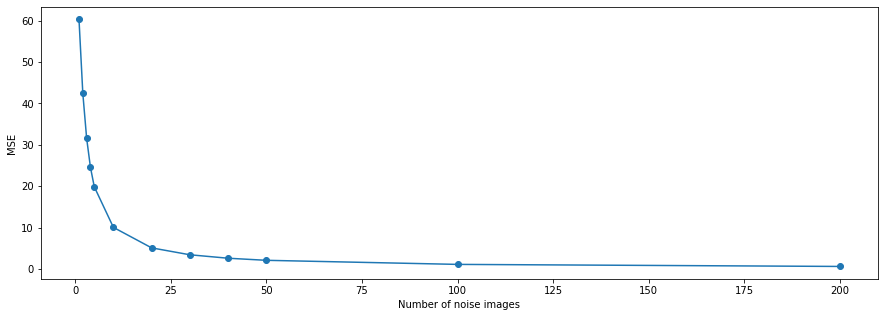

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(n_images_list, mse, marker='o')
plt.ylabel("MSE")
plt.xlabel('Number of noise images')
plt.plot()